# 1. Xây dựng Model dùng nn.Module

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__() # gọi hàm khởi tạo class mẹ
    self.conv1= nn.Conv2d(1,6,3) # in, output, stride
    self.conv2= nn.Conv2d(6,16,3)
    self.fc1= nn.Linear(16*6*6, 120)
    self.fc2= nn.Linear(120,84)
    self.fc3= nn.Linear(84,10)
  # kernel: w*h. vd kernel 2*2:
  # 1,2
  # 3,4
  def forward(self,x):
    x=self.conv1(x) # x phải khớp với in put của conv1
    x= F.relu(x) # relu là hàm trả về x nếu x>=0, trả về 0 nếu x<0
    x= F.max_pool2d(x,(2,2))# thao tác với kernel, lấy ra giá trị lớn nhất trong kernel: vd trên là 4.

    x= self.conv2(x)# tích chập: 2 ma trạn nhân với nhau
    x= F.relu(x)
    x=F.max_pool2d(x,2) # viết 2 tg đương (2,2)
    # Đang ở dạng ma trận 2 chiều nên mình sẽ chuyển về 1 chiều:
    x= x.view(-1,self.num_flat_features(x)) # dùng hàm trước viết hàm sau

    x=F.relu(self.fc1(x)) # x là tham số chiều
    x= F.relu(self.fc2(x))
    x= F.relu(self.fc3(x))
    return x

  def num_flat_features( self, x):
    size= x.size()[1:] # lấy chiều bắt đầu từ 1 trở đi; tg đương shape
    num_features= 1
    for s in size: # giả sử size ra là (3, 4, 5)
      num_features *= s
    return num_features # Ở đây sẽ là 3*4*5
    # Hàm trên sẽ lấy tích các emation tiếp theo sau emation đầu tiên và trả về làm tham số hàm view


In [ ]:
net= Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
input_image= torch.rand(1,1,32,32) # machi, 1 chanel, ccao 32, crong 32
output= net(input_image)
output.size()

torch.Size([1, 10])

# 2. Xây dụng Model dùng nn.Sequential

In [ ]:
import torch
import torch.nn as nn

In [ ]:
net= nn.Sequential()

In [ ]:
class Flatten(nn.Module):
  def forward(self,x): # x=(10,3,32,32) 10 ảnh, 3 kernel, ccao 32, crong 32
    size=x.size()[1:] # nó lấy (3,32,32)
    num_features=1
    for s in size:
      num_features *= s
    return x.view(-1,num_features) #->(10,3*32*32)


In [ ]:
net.add_module("Conv1", nn.Conv2d(1,6,3))
net.add_module("RELU1",nn.ReLU())
net.add_module("Maxpooling1", nn.MaxPool2d(2))

net.add_module("Conv2",nn.Conv2d(6,16,3))
net.add_module("RELU2", nn.ReLU())
net.add_module("Maxpooling2", nn.MaxPool2d(2))
net.add_module("Flatten", Flatten())

net.add_module("Fc1",nn.Linear(16*6*6,120))
net.add_module("Fc2",nn.Linear(120,84))
net.add_module("Fc3",nn.Linear(84,10))

In [ ]:
print(net)

Sequential(
  (Conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (RELU1): ReLU()
  (Maxpooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (RELU2): ReLU()
  (Maxpooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Flatten): Flatten()
  (Fc1): Linear(in_features=576, out_features=120, bias=True)
  (Fc2): Linear(in_features=120, out_features=84, bias=True)
  (Fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
input= torch.rand(1,1,32,32)

In [ ]:
output= net(input)

In [ ]:
print(output.shape)

torch.Size([1, 10])


# 3. Load model

**Bộ dữ liệu**

ImageNet dataset: Do đại học Stanford thu thập trên internet

- 1000 class

- 1200000 ảnh train

- 50000 ảnh valid

- 100000 ảnh test

**Model trainsfer**

VGG-16 lớp layer

**Import**

In [ ]:
!pip install torch torchvision --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import torch
import torchvision# thư viện chủ đề computer vision
from torchvision import models,transforms
from PIL import Image
import matplotlib.pyplot as plt
import json

In [ ]:
# Nếu chưa có PIL
# !pip install pilow
# NNếuchuaw có matplot
# !pip install matplotlib

In [ ]:
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


# 4. Sử dụng model VGG16 cho dữ liệu Image Net

In [ ]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 91.4MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Nhìn có vẻ nhiều tới 38 dòng thể hiện 38 lớp nhưng lý do nó chỉ gọi là VGG16 vì nó chỉ xét đếm một số lớp chính như: Conv, Linear. Các lớp phụ như Maxpool, Dropout, ReLU,... sẽ không được tính.

In [ ]:
# lớp tiền xử lý
class BaseTransform():
  def __init__(self,resize, mean, std):
    self.base_transform =transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(resize),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
  def __call__(self,img):# hàm db, khi viết trong 1 class thì chỉ cần gọi tên class đó ra nó sẽ tự động chạy vào hàm này.
    return self.base_transform(img)


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/CB_Học máy nâng cấp/CDeepLearning/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


move image dowload vào data trong jupyter

In [ ]:
#!ls # lấy vào ảnh vừa dowload từ trình duyệt về máy

drive  sample_data


In [ ]:
#!mkdir data

In [ ]:
#!mv c2.jpg data

In [ ]:
#!ls data

c2.jpg


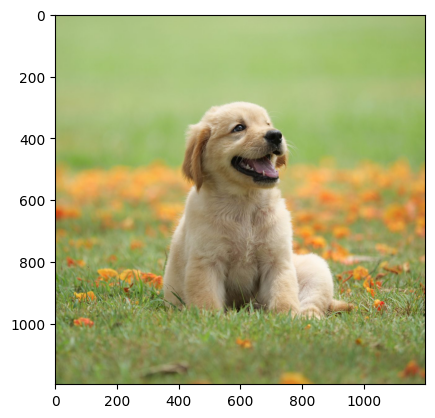

In [ ]:
image_file_path='./data/c2.jpg'
img= Image.open(image_file_path)

plt.imshow(img)
plt.show()

Do vgg16 nhận bức ảnh chiều 224x224. Mục tiêu của mình là resize bức ảnh về dạng đó.

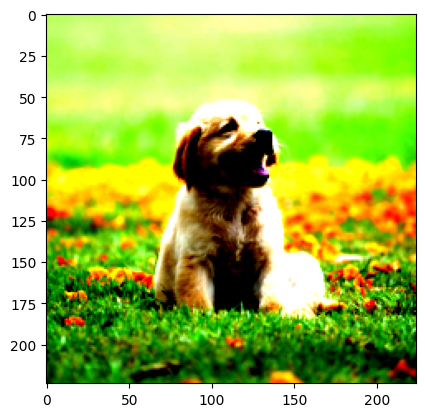

In [ ]:
resize= 224
# Có thế search "mean std imagenet" để tìm Thông số mean và std giống trong imagenet dataset: thông số thường dùng cho chuẩn hóa ảnh trong pytorch:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform= BaseTransform(resize,mean,std) # set thông số khi khởi tạo transform chứ chưa truyền gì vào nó cả
img_transformed= transform(img) # transform ảnh input

# lưu ý ảnh đọc từ pilow hay từ Image.open(image_file_path) và load vào mạng pytorch thứ tự nó sẽ khác nhau. Vì vậy mình đổi ngược lại nó.
# Nó sẽ là: (chanels, ccao, crong) -> (ccao,rong, chanels).
# Và sau khi đổi ta cần đưa về dạng (0,1): clip(0,1)
# Để đảm bảo các pixel trong bức ảnh đó phải nằm trong khoảng 0 và 1.
img_transformed= img_transformed.numpy().transpose(1,2,0) # đổi vị trí các kênh cho nhau: số 2 chanel vào giữa, 1 lên đầu
img_transformed= np.clip(img_transformed, 0,1)

plt.imshow(img_transformed)
plt.show()

## Dự đoán ảnh từ model

Ta đã Base transform ảnh làm input cho VGG16, từ đó lấy đầu ra gồm 1000 class.

Kế tiếp chúng ta sẽ đưa đầu ra đi qua bước Predictor, qua đó nó sẽ trả về nhãn của các inbox có xác suất cao nhất.

In [ ]:
class Predictor():
  def __init__(self,class_index):
    self.class_index= class_index

  def predict_max(self, out): # out là lớp cuối cùng dạng tensor của mô hình VGG16, nó đang gắn lièn với network đó.
    maxid= np.argmax(out.detach().numpy()) # Ta cẩn tách nó ra và chuyển về dạng numpy với hàm detach. Sau đó lấy ra index có GT cao nhất của đầu ra đó.
    predicted_label_name= self.class_index[str(maxid)] #

    return predicted_label_name

Ta tải file dữ liệu mẫu cho mô hình sắp tới ở [đây](https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json)

Sau đó load nó lên vị trí thư mục data chứa dữ liệu cho các bài code này.

In [ ]:
!ls #kiểm tra tên file vừa load đó

C1.ipynb  C2.ipynb  data  imagenet_class_index.json


In [ ]:
class_index= json.load(open('./data/imagenet_class_index.json', 'r'))# tải nó lên

In [ ]:
predictor = Predictor(class_index)

In [ ]:
# Chúng ta sẽ đọc một bức ảnh vào từ file data của mình
img_file_path= './datta/c2.jpg'
img = Image.open(image_file_path)

resize= 224
# Có thế search "mean std imagenet" để tìm Thông số mean và std giống trong imagenet dataset: thông số thường dùng cho chuẩn hóa ảnh trong pytorch:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform= BaseTransform( resize, mean, std)
#truyền ảnh vào transform đó
img_transformed= transform(img)
#img_transformed.shape # 3chanel, cc 224, cr 224
# để đưa ảnh vào vggnet cần thêm 1 chiều nữa là demantio machi, nên mình sẽ thêm 1 cái vào phia trước:
img_transformed= img_transformed.unsqueeze_(0)
# img_transformed.shape # đã chủ: machi, chanel, cc,cr
# Rồi mình sẽ đưa cai tensor đó vào cái network của mình
out= net(img_transformed)
result= predictor.predict_max(out)
print("Result is: ", result)

Result is:  ['n02099601', 'golden_retriever']


Đó là kết quả sau khi đưa ảnh vào vgg16: golden_retriever. Đây là ảnh giống chó này khi search GG:

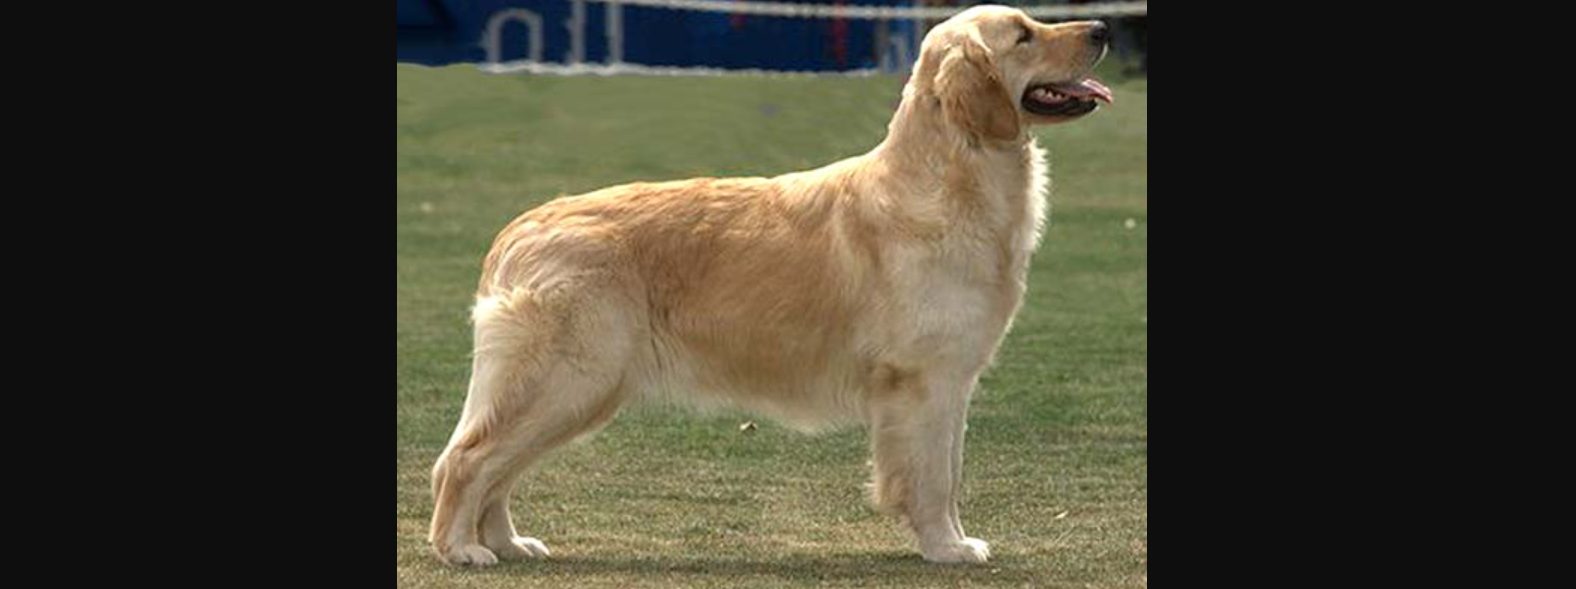

# 5. Xây dựng model Transfer phân loại ong kiến

Mục tiêu là xây dựng một mô hình transfer từ mô hình sẵn VGG16 trên tập data bisnet.

Bên cạnh PP transfer còn có PP firetuning, nó còn thay đổi các lớp gần với đầu vào người ta gọi là fireturn. Còn nếu chỉ thay đổi các lớp layer phần cuối của model network ngta gọi là transfer learning; để vẫn giữ lại được các đặc tính của model đối với những tập dữ liệu lớn có sẵn.


In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive/')
# os.chdir('./drive/MyDrive/CB_Học máy nâng cấp/CDeepLearning/')

import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/Code_Inter/')

Mounted at /content/drive/


In [ ]:
# # tải data qu link url zip
# import os
# import zipfile
# import urllib.request


In [ ]:
# url='https://dowsload.pytorch.org/tutorial/hymenoptera_data.zip' # link data file zip
# save_path= os.path.join(data_dir,"hymenoptera_data.zip")

# if not os.path.exists(save_path):
#   urllib.request.urlretrieve(url, save_path)

#   #đọc file zip
#   zip= zipfile.ZipFile(save_path)
#   zip.extractall(data_dir)
#   zip.close()

#   os.remove(save_path)
# Thử cách tải auto link nhung lỗi link

In [ ]:
# !ls data/hymenoptera_data/train/ants/ | wc -l # Đếm số ảnh kiến trong thư mục train
# !ls data/hymenoptera_data/val/ants/ | wc -l # Đếm số ảnh kiến trong thư mục val

# !ls data/hymenoptera_data/train/bees/ | wc -l
# !ls data/hymenoptera_data/val/bees/ | wc -l

ls: cannot access 'train/Váy': No such file or directory
ls: cannot access 'body/': No such file or directory
0


## Tạo dataset class với pytorch


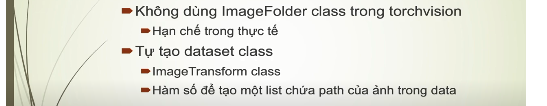

Với các dữ liệu thực tế các dữ liệu mới chưa được chia sẵn thành các nhóm theo class như trong các tập dữ kiệu có sẵn. Do đó chúng ta cần tự tạo một tập dataset như thế với 2 bước:

B1: Tiền xử lý: resize, crop, thêm noise,..

B2: Hàm load các path của bức ảnh để trả ra cho model mình học.


In [ ]:
import glob
import os.path as osp
import random
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

!pip install tqdm
from tqdm import tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
torch.manual_seed(1234) #Số mã random để sau này muốn chạy lại thí nghiệm với mẫu random này có thter thwujc hiện lại được
np.random.seed(1234) #Nếu chạy sang máy khác hay vẫn máy đó mà không lưu số random thì các số random đó sẽ khác nhau
random.seed(1234)

In [ ]:
# torch.backends.cudnn.deterministic= True
# torch.backends.cudnn.benchmark= False
# Thông số QT khi dùng GPU để traning. Để đảm bảo kết quả chạy các lần thí nghiệm sẽ giống nhau.
# Vì hiện tại ta chuae cần dung GPU nên comment đi chứ chưa cần dùng.
# Tất nhiên dùng để đảm bảo kết quả giống nhau là tốt nhất nhung khi thiết lập nhuw thế nhày tốc đọ sẽ chậm đi.


In [ ]:
class ImageTransform():#Tiền xử lý ảnh
  def __init__(self, resize, mean, std):
    self.data_transform={#Xử lý riêng cho từng tập train và val.
      'train':transforms.Compose([
        transforms.RandomResizedCrop(resize, scale=(0.5,1.0)), #Cắt nó xong và resize về dạng YCau của mình. Cắt nó với khoảng scale trong từ 0.5->1: nó sẽ giảm đi nhỏ nhất là nửa bức ảnh hoặc giữ nguyên
        transforms.RandomHorizontalFlip(), #Tham số mặc định là xác suất xoay bức ảnh theo chiều ngang là 0.5
        transforms.ToTensor(), #Đưa ảnh về dạng tensor
        transforms.Normalize(mean, std) #Đưa ảnh về dạng tiêu chuẩn với bộ dữ liệu gốc.
        ]),

      'val': transforms.Compose([
          transforms.Resize(resize),
          transforms.CenterCrop(resize),
          transforms.ToTensor(),
          transforms.Normalize(mean, std)
      ])
    }

  def __call__(self, img,phase='train'): # ảnh, mode: train
    return self.data_transform[phase](img) # Khi truyền vào ảnh nó sẽ xur lý các bước với hàm init và trả ra kết quả.



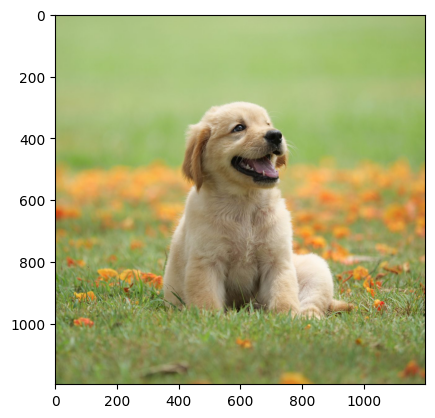

In [ ]:
img_file_path= './data/c2.jpg'
img= Image.open(img_file_path)

plt.imshow(img) #show ảnh
plt. show()# Show ra khung hình

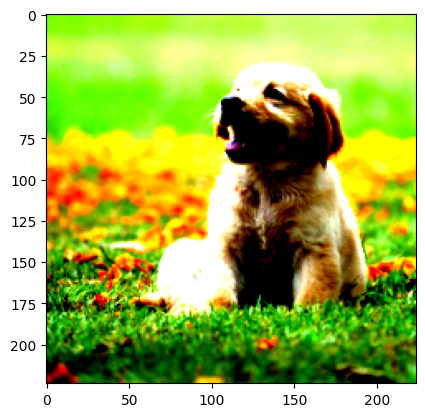

In [ ]:
resize= 224
# Có thế search "mean std imagenet" để tìm Thông số mean và std giống trong imagenet dataset: thông số thường dùng cho chuẩn hóa ảnh trong pytorch:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

transform= ImageTransform(resize,mean,std) ##Còn dùng trong class MyDataset phía dưới
img_transformed= transform(img, phase='train')
# TRc khi in phải trả về đúng thứ tự vì nó đã bị biến đổi qua .ToTensor()
# Thứ tự ban đàu: chanel, cc, cr-> cc, cr, chanel-> (0,1)
img_transformed= img_transformed.numpy().transpose(1,2,0 )
img_transformed= np.clip(img_transformed, 0,1)
plt.imshow(img_transformed)
plt.show()

# Lưu ý kết quả của mỗi lần chạy là khác nhau do tiền xử lý có dùng các hàm random
# Sử dụng hàm random như thế sẽ giúp đa dạng hơn trong data cho các bộ dữu liệu ít, và làm model học được nhieuf hơn.
# Ta không dùng random trong val vì khi test nếu có sự biến động với ảnh test thực tế như thế sẽ dẫn đến các đnahs giá không chính xác

tiếp theo thì là mình sẽ tạo thêm một cái hàm cái, mà đầu mình nói là sẽ để Liệt kê các path đường link dẫn
đến các cái ảnh vào liệt kê nó vào 1 cái list, sau đó mình truyền list ấy vào trong cái data class của mình.

In [ ]:
def make_datapath_list(phase="train"):
  rootpath="./data/hymenoptera_data/"
  target_path= osp.join(rootpath+phase+"/**/*.jpg") # ong hoặc kiến-> ảnh
  #print(target_path) #check

  path_list=[]

  for path in glob.glob(target_path):# phần glob sẽ tạo ra list gồm các đường link các bức ảnh
    # từ list đó mình stack nó vào path_list
    path_list.append(path)

  return path_list

In [ ]:
#make_datapath_list("train") #check
path_list= make_datapath_list("train")

In [ ]:
len(path_list)

243

In [ ]:
path_list[:10]

['./data/hymenoptera_data/train/bees/465133211_80e0c27f60.jpg',
 './data/hymenoptera_data/train/bees/39672681_1302d204d1.jpg',
 './data/hymenoptera_data/train/bees/2384149906_2cd8b0b699.jpg',
 './data/hymenoptera_data/train/bees/2477324698_3d4b1b1cab.jpg',
 './data/hymenoptera_data/train/bees/507288830_f46e8d4cb2.jpg',
 './data/hymenoptera_data/train/bees/2651621464_a2fa8722eb.jpg',
 './data/hymenoptera_data/train/bees/2728759455_ce9bb8cd7a.jpg',
 './data/hymenoptera_data/train/bees/2908916142_a7ac8b57a8.jpg',
 './data/hymenoptera_data/train/bees/354167719_22dca13752.jpg',
 './data/hymenoptera_data/train/bees/2765347790_da6cf6cb40.jpg']

In [ ]:
train_list= make_datapath_list("train")
val_list= make_datapath_list("val")

In [ ]:
class MyDataset(data.Dataset):
  def __init__(self,file_list,transform= None, phase= "train"):
    self.file_list= file_list
    self.transform= transform
    self.phase= phase

  def __len__(self):
    return len(self.file_list)

  def __getitem__(self, idx): # láy ra ảnh theo chỉ số đưa vào
    img_path =self.file_list[idx]
    img= Image.open(img_path)

    img_transformeda= self.transform(img,self.phase) # Đến đây là xong tiền xử lý
    if self.phase== "train":
      label= img_path[30:34] #nhãn phía sau /data/ train/: ants or bees nằm trong chỉ số 30-33
    elif self.phase=="val":
      label= img_path[28:32]

    if label=="ants":
      label= 0
    elif label=="bees":
      label= 1

    return img_transformeda, label

In [ ]:
# test hay SD nó
train_dataset= MyDataset(train_list, transform= ImageTransform(resize,mean,std),phase="train")
val_dataset= MyDataset(val_list, transform= ImageTransform(resize,mean,std),phase="val")

In [ ]:
index=0
# print(train_dataset.__len__())
# print(train_dataset.__getitem__(index))

img, label= train_dataset.__getitem__(index)
print(img.shape)
print(label)

torch.Size([3, 224, 224])
1


## Tạo dataloader

Các nhóm ảnh ta sẽ gọi là các batchsize


In [ ]:
batch_size= 4 # trong 1 lần training nó sẽ đưa vào 4 ảnh

train_dataloader= torch.utils.data.DataLoader(train_dataset,batch_size,shuffle= True) # Mỗi epoch nó sẽ xáo trộn data cho mình
val_dataloader= torch.utils.data.DataLoader(val_dataset,batch_size, shuffle= True)

dataloader_dict= {'train': train_dataloader, 'val':val_dataloader}

In [ ]:
# thực hiện nó
batch_iterator= iter(dataloader_dict['train']) # dùng kiểu iter để có thể dùng với vòng loop được
inputs, labels= next(batch_iterator) # mỗi khi dùng next nó sẽ lấy ra cho mình 1 phần tử
# đầu ra hàm next ở trên là từ hàm train_dataset nên có cấu trúc img_transformeda, label


In [ ]:
print(inputs.size() )# 2 ảnh, 3 chanel màu, cc, cr
print(labels)# gồm các nhãn tương ứng là kiến ong kiến ong

torch.Size([4, 3, 224, 224])
tensor([1, 0, 1, 1])


## Network, loss, optimizer, training

### Network

In [ ]:
use_pretrained= True
net= models.vgg16(pretrained= use_pretrained)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Ta có đầu ra chỉ có 2 class nên ta sẽ chỉnh our_feature từ 1000 thành 2 ở class số 6 là xong.

In [ ]:
net.classifier[6]=nn.Linear( in_features= 4096, out_features= 2)
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# seting mode
net= net.train() # mode train thì các tensor sẽ có các mục để mình giữ lại cái gradient khi mà nó thực hiện thao tác backward


### Loss


In [ ]:
criterior= nn.CrossEntropyLoss()

### optimizer

In [ ]:
#optimizer= optim.SGD(params= net.parameters(), lr= 0.001, momentum= 0.9)
# khi các ts param thay đổi thì nó sẽ update thông qua hàm parameter() với tốc độ update phụ thuộc vào learning rate.

In [ ]:
# tuy nhiên các trên sẽ làm update cho toàn bộ pharameter của cả network tuy nhiên
# vs TH chỉ muốn update cho các lớp cuối thì ta có thể làm như sau:
param_to_update= []
update_params_name=["classifier.6.weight", "classifier.6.bias"]

for name, param in net.named_parameters():
  if name in update_params_name:
    param.requires_grad= True
    param_to_update.append(param)
    print(name)
  else:
    param.requires_grad=False

print(param_to_update)

classifier.6.weight
classifier.6.bias
[Parameter containing:
tensor([[-3.7193e-05, -9.1663e-03,  3.5248e-03,  ..., -6.4912e-03,
          9.3823e-03, -3.8686e-03],
        [-6.9692e-03,  3.2922e-03,  3.5246e-03,  ..., -1.2998e-02,
         -2.8497e-03, -3.4454e-03]], requires_grad=True), Parameter containing:
tensor([0.0024, 0.0099], requires_grad=True)]


In [ ]:
optimizer= optim.SGD(params= param_to_update, lr= 0.001, momentum= 0.9)
# khi các ts param thay đổi thì nó sẽ update thông qua hàm parameter() với tốc độ update phụ thuộc vào learning rate.

In [ ]:
def train_model(net,dataloader_dict, criterior, optimizer, num_epochs):
  for epoch in range(num_epochs):
    print("Epoch{}/{}".format(epoch, num_epochs))

    for phase in ['train','val']:
      if phase== 'train':
        net.train()
      else:
        net.eval()

      epoch_loss= 0.0
      epoch_corrects= 0

      if (epoch==0) and (phase == 'train'):
        continue
      for inputs, labels in tqdm(dataloader_dict[phase]):#tqdm giúp hiển thị phần trăm độ hoàn thành khi train các epoch
        optimizer.zero_grad()# reset cho từng input ảnh
        with torch.set_grad_enabled(phase=="train"):
          outputs= net(inputs)
          loss= criterior(outputs,labels) # lưu loss và số predict đúng
          _, preds = torch.max(outputs,1)

          if phase == 'train': # áp dụng cập nhật backwrad cho tập train
            loss.backward()
            optimizer.step()

          epoch_loss+= loss.item()*inputs.size(0) # Lưu các chỉ số từng epoch
          epoch_corrects+= torch.sum(preds==labels.data)
      epoch_loss= epoch_loss/len(dataloader_dict[phase].dataset)
      epoch_accuracy= epoch_corrects.double()/len(dataloader_dict[phase].dataset)

      print("{} Loss: {:.4f} Acc: {:.4f}".format(phase,epoch_loss,epoch_accuracy))


In [ ]:
num_epochs= 2
train_model(net,dataloader_dict,criterior, optimizer, num_epochs)

Epoch0/2


100%|██████████| 39/39 [01:35<00:00,  2.44s/it]


val Loss: 0.8504 Acc: 0.2484
Epoch1/2


100%|██████████| 61/61 [02:26<00:00,  2.40s/it]


train Loss: 0.2646 Acc: 0.8724


100%|██████████| 39/39 [01:30<00:00,  2.31s/it]

val Loss: 0.0721 Acc: 0.9739
